In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

pd.set_option("display.max_columns",0)

In [35]:
TA_REVIEW_DATA_PATH = os.path.join("..","..","data","TA_User_Reviws_Korea_all.json")
df2 = pd.read_json(TA_REVIEW_DATA_PATH)

In [36]:
df2.head(5)

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,photos,userId,__typename,location.locationId,location.name,location.additionalNames.long,location.additionalNames.longOnlyParent,location.additionalNames.__typename,location.placeType,location.isGeo,location.parentGeoId,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,location.reviewSummary.__typename,location.thumbnail.id,location.thumbnail.photoSizes,location.thumbnail.__typename,location.parent.locationId,location.parent.parentGeoId,location.parent.name,location.parent.additionalNames.long,location.parent.additionalNames.__typename,location.parent.__typename,location.route.url,location.route.__typename,location.socialStatistics.isSaved,location.socialStatistics.__typename,location.__typename,userProfile.userId,userProfile.isMe,userProfile.isVerified,userProfile.displayName,userProfile.username,userProfile.contributionCounts.sumAllUgc,userProfile.contributionCounts.__typename,userProfile.avatar.id,userProfile.avatar.photoSizes,userProfile.avatar.__typename,userProfile.hometown.locationId,userProfile.hometown.fallbackString,userProfile.hometown.location,userProfile.hometown.__typename,userProfile.expertForums.generalForumIds,userProfile.expertForums.geoForumLocationIds,userProfile.expertForums.__typename,userProfile.route.url,userProfile.route.__typename,userProfile.__typename,userProfile.isFollowing,userProfile.followerCount,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isBoosted,socialStatistics.boostCount,socialStatistics.likeCount,socialStatistics.isReposted,socialStatistics.repostCount,socialStatistics.isSaved,socialStatistics.tripCount,socialStatistics.__typename,route.url,route.__typename,tripInfo.stayDate,tripInfo.__typename,userProfile.hometown.location.locationId,userProfile.hometown.location.name,userProfile.hometown.location.additionalNames.long,userProfile.hometown.location.additionalNames.__typename,userProfile.hometown.location.parent.locationId,userProfile.hometown.location.parent.name,userProfile.hometown.location.parent.__typename,userProfile.hometown.location.__typename,tripInfo,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],"[{'id': 453807126, 'title': None, 'description...",F9AD0C1F6409A1574AD0AFC237D2A4CE,Review,14159911,Hotel Gracery Seoul,"Hotel Gracery Seoul, South Korea",South Korea,AdditionalNames,ACCOMMODATION,False,294197,86.0,4.0,14159911.0,LocationReviewSummary,361115988.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Hotel_Review-g294197-d14159911-Reviews-Hotel_...,LocationDetailRoute,False,SocialStatistics,LocationInformation,F9AD0C1F6409A1574AD0AFC237D2A4CE,False,False,nataliea328,nataliea328,7,ContributionCounts,452388042.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,NaN,None,NaN,MemberLocation,[],[],ExpertForums,/Profile/nataliea328,MemberProfileRoute,MemberProfile,0.0,0.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d14159911-r748454819-...,ShowUserReviewRoute,2020-02-29,TripInfo,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,1958940,Hongik University Street,"Hongik University Street, South Korea",South Korea,AdditionalNames,ATTRACTION,False,294197,2256.0,4.5,1958940.0,LocationReviewSummary,38633900.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",Additiona

In [6]:
df['location.placeType'].value_counts()

ACCOMMODATION    14421
EATERY           12118
ATTRACTION       10540
ACTIVITY           117
CITY                 1
Name: location.placeType, dtype: int64

In [7]:
df[df['location.placeType'] == "EATERY"]['location.additionalNames.long'].value_counts()

Myeongdong Kyoja Main, South Korea                        166
Tosokchon Samgyetang, South Korea                         126
Yoogane Myeongdong 1st Store, South Korea                  37
Isaac Toast Myeongdong, South Korea                        37
Sinseon Seolleongtang Myeongdong, South Korea              31
                                                         ... 
Guryongpo Gyejeol Hoejib, South Korea                       1
Seongsu Kalguksu, South Korea                               1
Starbucks Jinju Gyeongsang National Univ., South Korea      1
Yugane Dakgalbi Cheonho, South Korea                        1
Hyeongje Yukheo, South Korea                                1
Name: location.additionalNames.long, Length: 7066, dtype: int64

## 2차 데이터 추가 

In [4]:
DATA_PATH = lambda x: os.path.join("..","..","data",x)

In [5]:
df_hotel = pd.read_json(DATA_PATH("TA_Hotel_Reviews.json"))
df_eat = pd.read_json(DATA_PATH("TA_Seoul_Eatery_Reviews.json"))

In [ ]:
df = pd.concat([df_hotel, df_eat])
df = df.reset_index(drop=True)

In [ ]:
df = df.dropna(subset=['userId'])
df = df.dropna(axis=1)
df = pd.concat([df, df2])

## Version 2 데이터 개요

1. User 추가: 기존 7613명 ===> 70872명
2. Location 서울만으로 한정지어 축소
3. 여러 곳 평가한 사람도 2배 이상 증가

In [140]:
df = df[df['location.parent.additionalNames.long'] == 'Seoul, South Korea']

In [141]:
df = df.drop_duplicates(subset=['id'])

In [142]:
df.shape, df2.shape

((144434, 32), (37197, 95))

In [144]:
df = df.dropna(axis=1)

In [145]:
df.reset_index(drop=True, inplace=True)

In [146]:
df.userId.nunique()

70872

In [154]:
df2["location.placeType"].value_counts()

ACCOMMODATION    14421
EATERY           12118
ATTRACTION       10540
ACTIVITY           117
CITY                 1
Name: location.placeType, dtype: int64

In [155]:
df["location.placeType"].value_counts()

EATERY           81645
ACCOMMODATION    55845
ATTRACTION        6856
ACTIVITY            88
Name: location.placeType, dtype: int64

In [147]:
display(df2.groupby(["userId","location.placeType"]).size().unstack(-1))
display(df.groupby(["userId","location.placeType"]).size().unstack(-1))

location.placeType,ACCOMMODATION,ACTIVITY,ATTRACTION,CITY,EATERY
userId,,,,,
0009720721B493BAE608AA592B9CE7AE,1.0,NaN,1.0,NaN,NaN
00150C8ACD87B7A3A54497D923CB3358,2.0,NaN,2.0,NaN,30.0
001608AFA00EC79804E14EE201018BBB,1.0,NaN,NaN,NaN,NaN
00178BFBBC5B052A9E0845691F9585B4,2.0,NaN,5.0,NaN,NaN
001A6C668BB5BE75A85603BBADAEBCD9,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
FFD763E06A0001B0F8143C91D2EE35FB,1.0,NaN,NaN,NaN,NaN
FFF028A54917977AB9549FD75103ECDA,1.0,NaN,NaN,NaN,NaN
FFF66251C5DC520DA1F9D217419BD90A,1.0,NaN,NaN,NaN,NaN


location.placeType,ACCOMMODATION,ACTIVITY,ATTRACTION,EATERY
userId,,,,
0001422DDBC8371F0D5638A54A67B49E,1.0,NaN,NaN,NaN
0001DF001B6F7F9B9B5382CC2E820F3D,1.0,NaN,NaN,NaN
0002941EB80B8D62C497FCFE89FE5FE5,1.0,NaN,NaN,NaN
0002C7C9BF0686DB770487FD63B5C6F5,NaN,NaN,NaN,10.0
000347839C2E555CE5DDEA19BE2F0572,NaN,NaN,NaN,1.0
...,...,...,...,...
FFFAC8BEDEB2688CED0FFBB720B579EC,1.0,NaN,NaN,NaN
FFFB8DA80DB5D74BFB28A8C581007477,NaN,NaN,NaN,2.0
FFFBD5D5AB0E4CE360D46669493AD16B,NaN,NaN,NaN,2.0


In [149]:
df_pivot = df.pivot_table('id', "userId","location.placeType", aggfunc="count", margins=True)
df_pivot2 = df2.pivot_table('id', "userId","location.placeType", aggfunc="count", margins=True)

### 호텔, 식당 모두 리뷰를 남긴 사람들의 리뷰수 분포도

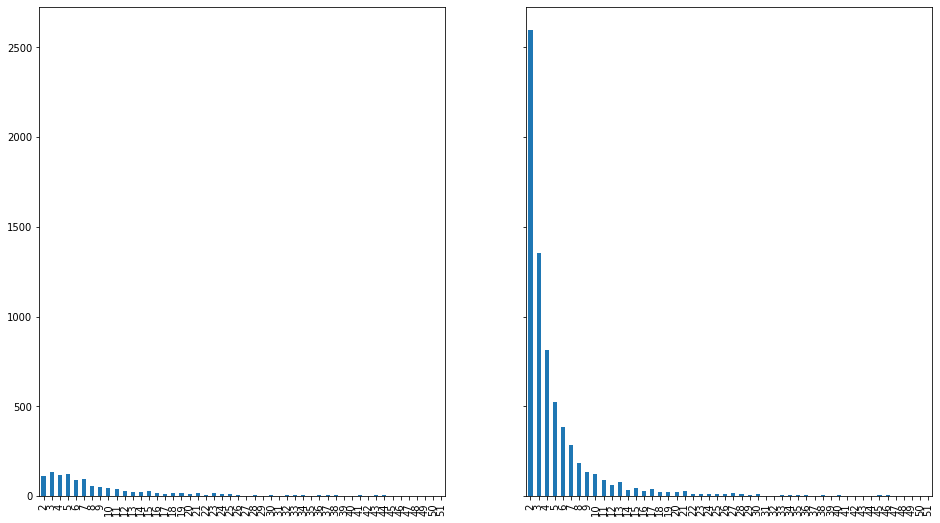

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df_pivot2.sort_values("All", ascending=False).dropna(subset=['ACCOMMODATION', 'EATERY'])["All"][1:].value_counts().sort_index()[:50].plot.bar(figsize=(16,9), ax=ax1)
df_pivot.sort_values("All", ascending=False).dropna(subset=['ACCOMMODATION', 'EATERY'])["All"][1:].value_counts().sort_index()[:50].plot.bar(figsize=(16,9), ax=ax2)
plt.show()

In [152]:
df_pivot.sort_values("All", ascending=False).dropna(subset=['ACCOMMODATION', 'EATERY'])["All"][1:].value_counts().sort_index()

2       2596
3       1352
4        811
5        524
6        384
        ... 
333        1
375        1
492        1
493        1
1584       1
Name: All, Length: 106, dtype: int64

## 데이터 Export

In [157]:
df.to_json("TA_User_Review_Seoul_all_v2.json", orient="records")